In [5]:
import qiskit
from qiskit import QuantumCircuit

In [6]:
qiskit.__version__

'1.2.0'

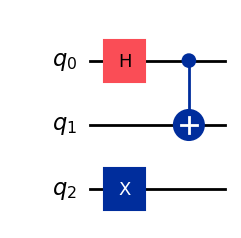

In [4]:
qc = QuantumCircuit(3)
qc.x(2)
qc.h(0)
qc.cx(0,1)

qc.draw("mpl")

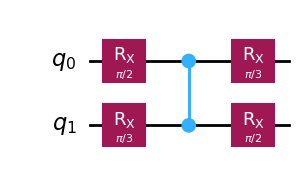

In [9]:
from qiskit.circuit.library import TwoLocal
from math import pi

reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]

reference_circuit = reference_circuit.assign_parameters(theta_list)

reference_circuit.decompose().draw("mpl")

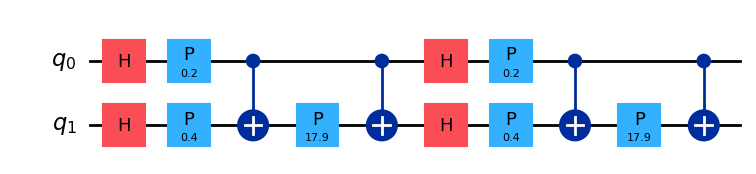

In [23]:
from qiskit.circuit.library import ZZFeatureMap

data = [0.1, 0.2]

zz_feature_map_reference = ZZFeatureMap(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
zz_feature_map_reference.decompose().draw("mpl")

Paramterized Quantum Circuits

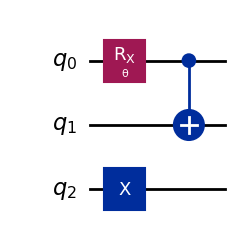

In [24]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter("θ")

qc = QuantumCircuit(3)
qc.rx(theta, 0)
qc.cx(0,1)
qc.x(2)

qc.draw("mpl")

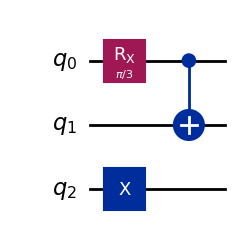

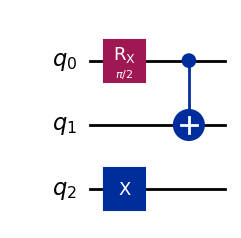

In [25]:
from math import pi

angle_list = [pi/3, pi/2]

circuits = [qc.assign_parameters({theta: angle}) for angle in angle_list]

for circuit in circuits:
    display(circuit.draw("mpl"))

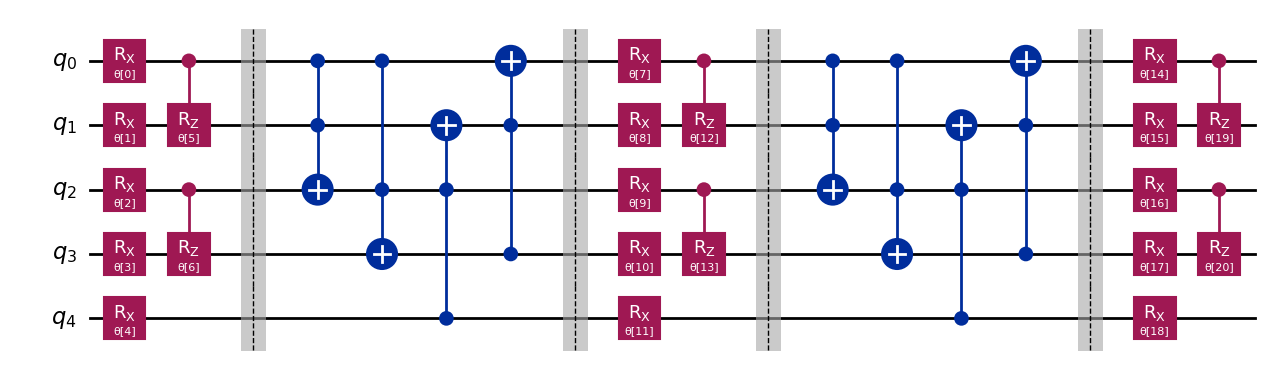

In [29]:
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate
from qiskit.circuit import Parameter

theta = Parameter("θ")
ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0, 1, 2], [0, 2, 3], [4, 2, 1], [3, 1, 0]],
    reps = 2,
    insert_barriers=True
)

ansatz.decompose().draw("mpl")

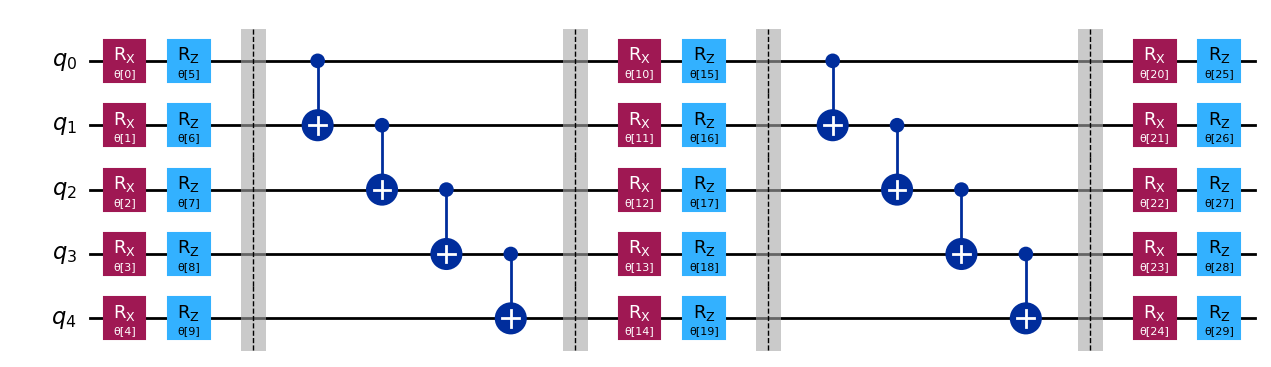

In [30]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
    insert_barriers=True
)

ansatz.decompose().draw('mpl')

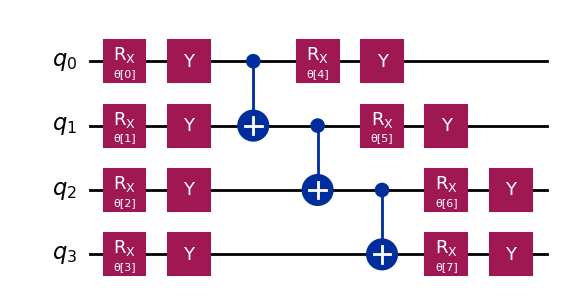

In [32]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")